<a href="https://colab.research.google.com/github/hoangnuthuphuong/Machine_Learning/blob/main/Chuong6_k-NN_NaiveBayes/Bai9_TrucQuanHoaKetQuaPhanLop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bài 9: TRỰC QUAN HÓA KẾT QUẢ PHÂN LỚP**

**1. Trực quan hóa giá trị xác suất của dự đoán**

Khi thực hiện phân lớp dữ liệu, kết quả ngoài nhãn lớp dự đoán thì mô hình còn cho ra giá trị xác suất thể hiện độ chắc chắn về kết quả nhãn lớp dự đoán. Trực quan hóa các giá trị xác suất này cho chúng ta cái nhìn rõ hơn về hiệu năng dự đoán của mô hình phân lớp.



##**Ví dụ 1 – trực quan kết quả phân lớp nhị phân:** Xây dựng mô hình phân lớp
LogisticRegression trên tập dữ liệu Breast Cancer. Vẽ đường cong xác suất dữ đoán của mô hình
phân lớp nêu trên.

X shape:  (569, 30) ; y shape:  (569,)
{0: 212, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


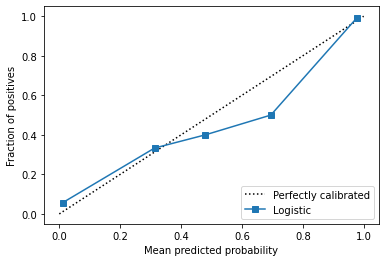

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
#B1: Đọc dữ liệu bài toán phân lớp nhị phân
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
print('X shape: ', X.shape, '; y shape: ', y.shape)
#Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
print(result)
#B2: Phân chia train - test
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=15,
shuffle=True,
test_size=0.30)
#B3: Khởi tạo và huấn luyện mô hình
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
#B4: Vẽ đường cong xác suất dự đoán
y_prob = lg_model.predict_proba(X_test)[:,1]
disp = CalibrationDisplay.from_predictions(y_test, y_prob,name='Logistic')
plt.show()

###**SỬ DỤNG HÀM**

In [2]:
import numpy as np
from sklearn import datasets
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

In [3]:
def readData():
  bc = datasets.load_breast_cancer()
  X = bc.data
  y = bc.target
  print('X shape: ', X.shape, '; y shape: ', y.shape)
  return X,y

In [4]:
def soluongmau(unique, counts):
  #Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
  unique, counts = np.unique(y, return_counts=True)
  result = dict(zip(unique, counts))
  print(result)
  return result

In [5]:
def normScaling(X, y):
    for col in range(1, X.shape[1]):
        temp = X[:, col]
        X[:, col] = (temp - np.min(temp)) / (np.max(temp) - np.min(temp))
    return X,y

In [6]:
def standardScaling(X, y):
    for col in range(1, X.shape[1]):
        temp = X[:, col]
        X[:, col] = (temp - np.mean(temp)) / (np.std(temp))
    return X,y

In [7]:
def costFunction(w, X, y):
    m = X.shape[0]
    h_w = 1 / (1 + np.exp(- np.dot(X, w)))
    J_w = (-1/m) * (np.dot(y, np.log(h_w)) + np.dot((1-y), np.log(1-h_w)))
    return J_w

In [8]:
def logisticRegression(X, y, w_init, method, iterations):
    result = optimize.minimize(fun=costFunction, x0=w_init, args=(X,y),
                               method= method,
                               options={"maxiter":iterations})
    return result.x, result.fun

In [9]:
def visualizeData(X,y):
    y_prob = lg_model.predict_proba(X_test)[:,1]
    disp = CalibrationDisplay.from_predictions(y_test, y_prob,name='Logistic')
    plt.show()

X shape:  (569, 30) ; y shape:  (569,)

số lượng mẫu của từng nhãn lớp
{0: 212, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


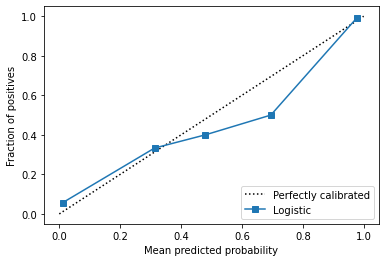

In [10]:
def main():
    #B1: Đọc dữ liệu bài toán phân lớp nhị phân
    X, y = readData()

    #B2: Phân chia train - test
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        random_state=15,
                                                        shuffle=True,
                                                        test_size=0.30)

    # số lượng mẫu của từng nhãn lớp - balanced dataset
    print("\nsố lượng mẫu của từng nhãn lớp")
    soluongmau(unique, counts)

    #Chuẩn hóa dữ liệu
    X_train, y_train = standardScaling(X_train, y_train)
    X_test, y_test = standardScaling(X_test, y_test)

    #B3: Khởi tạo và huấn luyện mô hình
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)

    #B4: Vẽ đường cong xác suất dự đoán
    visualizeData(X, y)

if __name__ == "__main__":
    main()

##**Ví dụ 2 – trực quan hóa kết quả phân lớp nhị phân:** 
Xây dựng mô hình phân lớp LogisticRegression trên tập dữ liệu Breast Cancer. Vẽ đường cong xác suất dữ đoán của mô hình phân lớp nêu trên.

###**CHƯƠNG TRÌNH**

X shape:  (569, 30) ; y shape:  (569,)
{0: 212, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


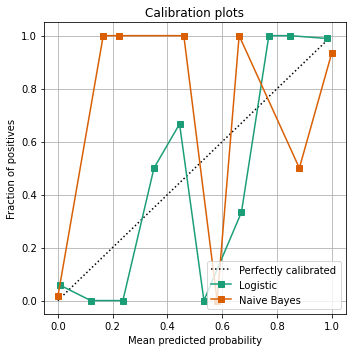

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
#B1: Đọc dữ liệu bài toán phân lớp nhị phân
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
print('X shape: ', X.shape, '; y shape: ', y.shape)
#Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
print(result)
#B2: Phân chia train - test
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=15,
shuffle=True,
test_size=0.30)
#B3: Khởi tạo và huấn luyện mô hình
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
#Tạo list chứa 2 mô hình trên
clf_list = [(lg_model, 'Logistic'), (gnb_model, 'Naive Bayes')]
#B4: Vẽ đường cong xác suất dự đoán
fig = plt.figure(figsize=(5, 5))
gs = GridSpec(2, 2)
colors = plt.cm.get_cmap("Dark2")
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
  display = CalibrationDisplay.from_estimator(clf,X_test,y_test,n_bins=10,name=name,ax=ax_calibration_curve,color=colors(i),)
  calibration_displays[name] = display
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
plt.tight_layout()
plt.show()

###**SỬ DỤNG HÀM**

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay

In [13]:
def readData():
  bc = datasets.load_breast_cancer()
  X = bc.data
  y = bc.target
  print('X shape: ', X.shape, '; y shape: ', y.shape)
  return X,y

In [14]:
def soluongmau(unique, counts):
  #Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
  unique, counts = np.unique(y, return_counts=True)
  result = dict(zip(unique, counts))
  print(result)
  return result

In [15]:
def visualizeData(X,y):
    fig = plt.figure(figsize=(5, 5))
    gs = GridSpec(2, 2)
    colors = plt.cm.get_cmap("Dark2")
    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    calibration_displays = {}
    for i, (clf, name) in enumerate(clf_list):
        display = CalibrationDisplay.from_estimator(
            clf,
            X_test,
            y_test,
            n_bins=10,
            name=name,
            ax=ax_calibration_curve,
            color=colors(i),
        )
calibration_displays[name] = display
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

X shape:  (569, 30) ; y shape:  (569,)

SỐ LƯỢNG MẪU CỦA TỪNG NHÃN LỚP:
{0: 212, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


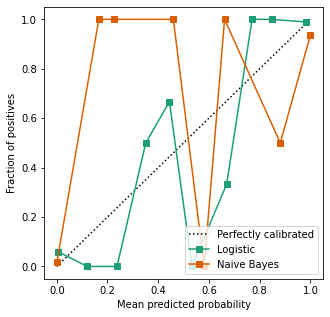

In [16]:
def main():
    #B1: Đọc dữ liệu bài toán phân lớp nhị phân
    X, y = readData()

    #B2: Phân chia train - test
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        random_state=15,
                                                        shuffle=True,
                                                        test_size=0.30)

    # số lượng mẫu của từng nhãn lớp - balanced dataset
    print("\nSỐ LƯỢNG MẪU CỦA TỪNG NHÃN LỚP:")
    soluongmau(unique, counts)

    #Chuẩn hóa dữ liệu
    X_train, y_train = standardScaling(X_train, y_train)
    X_test, y_test = standardScaling(X_test, y_test)

    #B3: Khởi tạo và huấn luyện mô hình
    lg_model = LogisticRegression()
    lg_model.fit(X_train, y_train)

    #Tạo list chứa 2 mô hình trên
    clf_list = [(lg_model, 'Logistic'), (gnb_model, 'Naive Bayes')]

    #B4: Vẽ đường cong xác suất dự đoán
    visualizeData(X, y)

if __name__ == "__main__":
    main()

## **2. Đường Precision & Recall**
Đường Precision – Recall chỉ ra mức độ ‘trao đổi – tradeoff’ giữa cặp giá trị Precision và Recall tại mỗi mức ngưỡng khác nhau. Phần diện tích dưới đường cong này càng lớn thì chỉ số
Precision và Recall càng cao (ám chỉ giá trị false positive và false negative tương ứng càng thấp).Trong khuôn khổ bài hướng dẫn này, chúng ta tìm hiểu cách vẽ đường Precision – Recall của mô hình phân lớp nhị phân.

**Lưu ý:** đường Precision – Recall thường được dùng khi tập dữ lieuj mất cân bằng về nhãn lớp.


### **CHƯƠNG TRÌNH**

X shape:  (569, 30) ; y shape:  (569,)
{0: 212, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


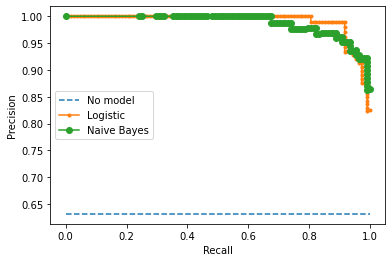

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
#B1: Đọc dữ liệu bài toán phân lớp nhị phân
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
print('X shape: ', X.shape, '; y shape: ', y.shape)
#Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
print(result)
#B2: Phân chia train - test
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=15,
shuffle=True,
test_size=0.30)
#B3: Khởi tạo và huấn luyện mô hình
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
#B4: Lấy xác suất dự đoán của mô hình
lg_probs = lg_model.predict_proba(X_test)
gnb_probs = gnb_model.predict_proba(X_test)
#Chỉ lấy xác suất dự đoán với nhãn positive
lg_probs = lg_probs[:,1]
gnb_probs = gnb_probs[:,1]
#B5: Lấy nhãn lớp dự đoán và giá trị precision & recall tương ứng
lg_pre, lg_rec, _ = precision_recall_curve(y_test, lg_probs)
gnb_pre, gnb_rec, _ = precision_recall_curve(y_test, gnb_probs)
#B6: Vẽ đường precision - recall
no_model = len(y_test[y_test==1])/len(y_test)
plt.plot([0,1], [no_model, no_model], linestyle = '--', label='No model')
plt.plot(lg_rec, lg_pre, marker ='.', label='Logistic')
plt.plot(gnb_rec, gnb_pre, marker='o', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

###**SỬ DỤNG HÀM**

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [19]:
#B1: Đọc dữ liệu bài toán phân lớp nhị phân
def readData():
  bc = datasets.load_breast_cancer()
  X = bc.data
  y = bc.target
  print('X shape: ', X.shape, '; y shape: ', y.shape)
  return X,y

In [20]:
#Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
def soluongmau(unique, counts):
  unique, counts = np.unique(y, return_counts=True)
  result = dict(zip(unique, counts))
  print(result)
  return result

In [21]:
#B2: Phân chia train - test
def train_test():
  X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=15,shuffle=True,test_size=0.30)
  return X_train, X_test, y_train, y_test


In [22]:
#B3: Khởi tạo và huấn luyện mô hình
def model_training():
  lg_model = LogisticRegression()
  lg_model.fit(X_train, y_train)
  gnb_model = GaussianNB()
  gnb_model.fit(X_train, y_train)
  return lg_model, gnb_model

In [23]:
#B4: Lấy xác suất dự đoán của mô hình
def probs():
  lg_probs = lg_model.predict_proba(X_test)
  gnb_probs = gnb_model.predict_proba(X_test)
  #Chỉ lấy xác suất dự đoán với nhãn positive
  lg_probs = lg_probs[:,1]
  gnb_probs = gnb_probs[:,1]
  return lg_probs,gnb_probs

In [24]:
#B6: Vẽ đường precision - recall
def visualizeData():
  no_model = len(y_test[y_test==1])/len(y_test)
  plt.plot([0,1], [no_model, no_model], linestyle = '--', label='No model')
  plt.plot(lg_rec, lg_pre, marker ='.', label='Logistic') 
  plt.plot(gnb_rec, gnb_pre, marker='o', label='Naive Bayes')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

X shape:  (569, 30) ; y shape:  (569,)

SỐ LƯỢNG MẪU CỦA TỪNG NHÃN LỚP:
{0: 212, 1: 357}

XÁC XUẤT DỰ ĐOÁN CỦA MÔ HÌNH LOGISTIC REGRESSION
 [9.93992499e-01 9.99107726e-01 1.28216914e-04 9.73820761e-01
 9.94822976e-01 1.46265400e-04 9.50157969e-01 9.79747783e-01
 8.44044533e-01 9.98556165e-01 4.10293986e-10 2.61110068e-04
 9.99473170e-01 9.99671928e-01 9.98162015e-01 9.81133522e-01
 9.03504573e-01 4.70642458e-01 9.97129737e-01 9.96901866e-01
 9.93352229e-01 9.17793806e-01 9.97820738e-01 9.67423742e-01
 9.94894480e-01 7.04030537e-03 7.70030210e-01 2.46101029e-01
 9.99764727e-01 1.24497650e-28 9.99527042e-01 3.44740436e-01
 9.80821996e-01 8.93037346e-01 9.98767675e-01 8.67667596e-01
 9.89176472e-01 4.83293602e-01 9.99848537e-01 9.97319404e-01
 3.36352674e-02 4.25316844e-01 5.71772340e-03 4.34504418e-02
 3.06456620e-11 6.83012540e-01 9.51841954e-01 9.96046837e-01
 9.59437994e-01 2.37202581e-04 1.85026041e-13 9.93148790e-01
 9.99788213e-01 9.90463983e-01 9.97546114e-01 9.93574293e-01
 9.984

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


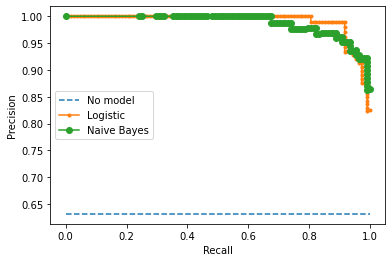

In [25]:
def main():
    #B1: Đọc dữ liệu bài toán phân lớp nhị phân
    X, y = readData()

    #B2: Phân chia train - test
    X_train, X_test, y_train, y_test = train_test()

    # số lượng mẫu của từng nhãn lớp - balanced dataset
    print("\nSỐ LƯỢNG MẪU CỦA TỪNG NHÃN LỚP:")
    soluongmau(unique, counts)

    #Chuẩn hóa dữ liệu
    X_train, y_train = standardScaling(X_train, y_train)
    X_test, y_test = standardScaling(X_test, y_test)

    #B3: Khởi tạo và huấn luyện mô hình
    lg_model, gnb_model = model_training()

    #B4: Lấy xác suất dự đoán của mô hình
    lg_probs,gnb_probs = probs()
    print("\nXÁC XUẤT DỰ ĐOÁN CỦA MÔ HÌNH LOGISTIC REGRESSION\n",lg_probs)
    print("\nXÁC XUẤT DỰ ĐOÁN CỦA MÔ HÌNH LOGISTIC GAUSIAN NB\n",gnb_probs)

    #B5: Lấy nhãn lớp dự đoán và giá trị precision & recall tương ứng
    lg_pre, lg_rec, _ = precision_recall_curve(y_test, lg_probs)
    gnb_pre, gnb_rec, _ = precision_recall_curve(y_test, gnb_probs)

    #B6: Vẽ đường precision - recall
    visualizeData()


if __name__ == "__main__":
    main()

##**3. Chỉ số True Positive Rate & False Positive Rate**

Để vẽ đường cong ROC - Receiver Operating Characteristic, 2 chỉ số sau cần được tính:
$$TPR = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{FP + TN}$$

##**4. Đường ROC**
Đường ROC thường được áp dụng đối với tập dữ liệu có số lượng nhãn lớp cân bằng. Tham khảo thêm về [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

Ví dụ: Vẽ đường ROC của 2 mô hình phân lớp nhị phân:

##**CHƯƠNG TRÌNH**

X shape:  (569, 30) ; y shape:  (569,)
{0: 212, 1: 357}
Mô hình Logistic Regression - ROC AUC:  0.983392122281011
Mô hình Naive Bayes - ROC AUC:  0.9801587301587302


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


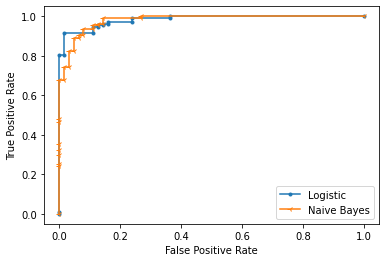

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#B1: Đọc dữ liệu bài toán phân lớp nhị phân
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
print('X shape: ', X.shape, '; y shape: ', y.shape)
#Xác định số lượng mẫu của từng nhãn lớp - balanced dataset?
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
print(result)
#B2: Phân chia train - test
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=15,
shuffle=True,
test_size=0.30)
#B3: Khởi tạo và huấn luyện mô hình
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
#B4: Lấy xác suất dự đoán nhãn positive của mô hình
lg_probs = lg_model.predict_proba(X_test)[:,1]
gnb_probs = gnb_model.predict_proba(X_test)[:,1]
#B5: Tính ROC score
lg_auc = roc_auc_score(y_test, lg_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
print('Mô hình Logistic Regression - ROC AUC: ', lg_auc)
print('Mô hình Naive Bayes - ROC AUC: ', gnb_auc)
#B6: Vẽ đường ROC
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
plt.plot(lg_fpr, lg_tpr, marker ='.', label='Logistic')
plt.plot(gnb_fpr, gnb_tpr, marker='3', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()